In [68]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, widgets
from IPython.display import display
import scipy.linalg
# %matplotlib notebook

# EE290T Homework 2 - Programming Exercises

## Part 1 - Krank and mutual coherence

__(a)__ Write a function that takes as an input a matrix $A \in R^{mxn}$, and outputs the Kruskal rank krank(A).

__*Note:__ There is no known way to efficiently compute the Kruskal rank!  It is fine if your code takes time exponential in n. Corroborate the conclusion of Theorem 2.2.6, by generating a 4x8 Gaussian matrix A, via A = np.random.randn(4,8) and computing its Kruskal rank.


In [69]:
list(range(4,0,-1))

[4, 3, 2, 1]

In [70]:
def choose(L,n):
    l_n = len(L)
    result = []
    for i in range(l_n-n+1):
        if n>1:
            L_update = L[i+1:]
            com = choose(L_update,n-1)
            for listn in com:
                listn.insert(0,L[i])
                result.append(listn)
        else:
            result.append([L[i]])
    return result

In [71]:
def krank(A):
    """ Your code here """
    m,n = A.shape
#     x=0
    for ii in range(m,0,-1):
        subset = choose(range(n),ii)
        flag = 0
        for item in subset:
#             if ii == 1:
#                 print(subset)
            matrix = A[:,item]
            r = np.linalg.matrix_rank(matrix)
#             if ii == 1:
#                 print(m)
            if r < ii:
                flag = 1
                break
        if flag == 0:
            x=ii
            break
    return x

In [72]:
""" Your code here """
A = np.random.randn(4,8)
print(krank(A))

4


__(b)__ Consider a $4 \times 8$ dimensional complex matrix generated as 

$$ \bf A = \left[ \; \bf I \mid \bf F \; \right] $$

where $\bf I$ is the $4 \times 4$ identity matrix, and $\bf F$ is a $4 \times 4$ Discrete Fourier Transform (DFT). Determine the Kruskal rank of $\bf A$. You should find that it is smaller than $4$! Compute the mutual coherence of the matrix $\bf A$.

In [73]:
"""Your functions here: """
def mutual_coherence(A):
    """ Your code here """
    m,n = A.shape
    B = A.copy()
    for i in range(n):
        col_i = A[:,i]
        norm = np.dot(col_i.T,col_i)
        B[:,i] = col_i/norm
    coherence = []
    subset = choose(range(n),2) #defined in the first part
    for item in subset:
        mat_coh = B[:,item]
        coherence.append(np.dot(mat_coh[:,0].T,mat_coh[:,1]))
    return np.max(coherence)

In [74]:
A = np.random.randn(4,8)
print(mutual_coherence(A))

0.46694457664528677


In [75]:
""" Your code here"""
A_i = np.identity(4)
A_f = scipy.linalg.dft(4)
A = np.hstack((A_i,A_f))
mutual = mutual_coherence(A)
print(krank(A))
print(mutual)

3
(4082809838298842.5+0.25j)




## Part 2 - Projected subgradient method for $\ell_1$ minimization

The projected gradient descent algorithm repeats the following iteration until convergence:

$$\boldsymbol x_{k+1} = P_C [\boldsymbol x_k - t_k \nabla f(\boldsymbol x_k)]$$

Where $P_C$ is a projection step of $\boldsymbol z$ onto the set $C$. 

$$ P_C[\boldsymbol z] = \text{arg} \min_{\boldsymbol x\in C} \frac{1}{2} \| \boldsymbol z- \boldsymbol x \|_2^2 = h(\boldsymbol x)$$




__(a)__ Implement the projected subgradient method for the following problem:

$$ \text{minimize} \|\boldsymbol x\|_1$$
$$ \text{subject to  } \boldsymbol y= \boldsymbol A \boldsymbol x   $$

$\boldsymbol A$, $\boldsymbol x$, and $\boldsymbol y$ are defined for you below: 

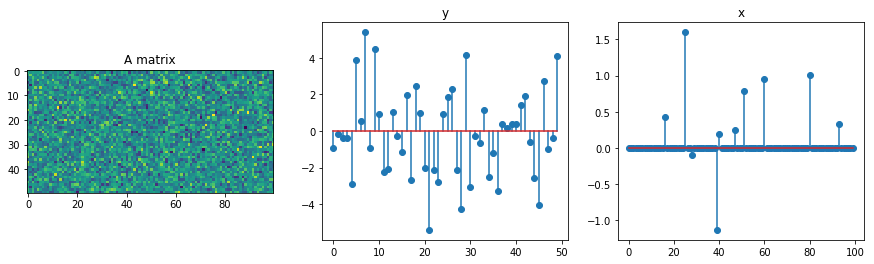

In [82]:
n = 100           # Matrix size
m = 50
k = 10            # Number of nonzeros 

x = np.concatenate((np.random.randn(k),np.zeros(n-k))) # Create sparse vector 
x = x[np.random.permutation(n)];

A = np.random.randn(m,n)                   # Create Matrix A 

y = A.dot(x)     

plt.figure(figsize=(15, 4));
plt.subplot(1,3,1), plt.imshow(A); plt.title('A matrix');
plt.subplot(1,3,2), plt.stem(y); plt.title('y');
plt.subplot(1,3,3), plt.stem(x); plt.title('x');

In [83]:
def sign(x):
    if x > 0:
        return 1
    if x < 0:
        return -1
    else:
        return np.random.uniform(-1,1)

In [84]:
def sign_v(x):
    x_p = x.copy()
#     print(x.size)
    for j in range(x.size):
        x_p[j] = sign(x[j])
    return x_p

In [85]:
def projected_gradient_descent(A,y,iteration):
    """ Your code here"""
    At = np.dot(A.T,np.linalg.inv(np.dot(A,A.T)))
    Atau = np.dot(At,A)
    Tau = np.identity(A.shape[1]) - Atau
    x_hat = np.dot(At,y)
    x0 = np.zeros(x_hat.shape)
    t = 0
    x_all = []
    for i in range(iteration):
#         print(i)
        t = t+1
        x0 = x_hat + np.dot(Tau,(x0-(1/t)*sign_v(x0)))
        x_all.append(x0)
    return x_all

In [86]:
x0 = projected_gradient_descent(A,y,1000)

<StemContainer object of 3 artists>

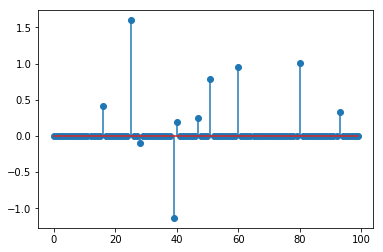

In [87]:
plt.stem(x0[-1])

__(b)__ Plot the recovered vector $ \hat{\boldsymbol x}_k$ and plot the error between the recovered vector $ \hat{\boldsymbol x}_k$ and the true vector $\boldsymbol x$ over the iterations. 

In [88]:
""" Your code here"""
iteration_n = 1000
x_all = projected_gradient_descent(A,y,iteration_n)
error = []
for i in range(iteration_n):
    x_calculated = x_all[i]
    error.append(np.linalg.norm(x_calculated - x,2)) # l2 norm to calculated the error


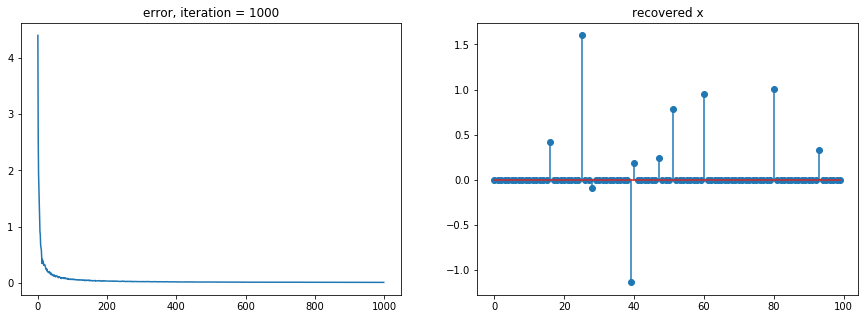

In [89]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1),plt.plot(range(iteration_n),error)
plt.title('error, iteration = 1000');

plt.subplot(1,2,2),plt.stem(x_all[-1])
plt.title('recovered x');

__(c)__ Fix the total number of iterations (e.g. 200), plot the final error as a function of the vector sparsity. 

In [90]:
""" Your code here"""

n = 100           # Matrix size
m = 50
error_all = []

for k in range(0,50):
#     k = 10            # Number of nonzeros 
#     k = t+1
#     print(k)
    
    x = np.concatenate((np.random.randn(k),np.zeros(n-k))) # Create sparse vector 
    x = x[np.random.permutation(n)];

    A = np.random.randn(m,n)                   # Create Matrix A 

    y = A.dot(x)     
    iteration_n = 200
    x_all = projected_gradient_descent(A,y,iteration_n)
    x_calculated = x_all[-1]
    error = np.linalg.norm(x_calculated - x,2)
    error_all.append(error)

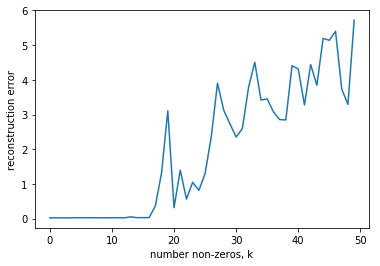

In [91]:
plt.plot(), plt.title(''), plt.xlabel('number non-zeros, k'), plt.ylabel('reconstruction error');
plt.plot(range(50),error_all)

## Part 3: Phase transition curves

Now, using the code you wrote in Part 2, we'll create a simple phase transition curve for this problem.  

If you didn't have one before, add a stopping condition to your alorithm so that it terminates if this stopping condition is met (How do we determine if our algorithm has converged?). 

__(a)__ Describe the stopping condition that you've chosen and why you've chosen this.

Answer: When doing $l^1$-minimization by projected subgradient, the stopping codition I have chosen is the $l^2 norm$ of $x_{t}-x_{[t/2]}$, when the $l^2 norm$ less than a certain criterian, the iteration loops terminate.($[t]$ means take the int part of $t$)

__(b)__ Find the fraction of successful recoveries when varying the sparsity of $\boldsymbol x$. Average over 100 trails and plot your findings.

In [166]:
def projected_gradient_descent_stop(A,y,criterian,iteration):
    """ Your code here"""
    At = np.dot(A.T,np.linalg.inv(np.dot(A,A.T)))
    Atau = np.dot(At,A)
    Tau = np.identity(A.shape[1]) - Atau
    x_hat = np.dot(At,y)
    x0 = np.zeros(x_hat.shape)
    t = 0
    err = 0
    x_all = []
    flag = 0
    for i in range(iteration):
#         print(i)
        t = t+1
        x_1 = x0.copy()
        x0 = x_hat + np.dot(Tau,(x0-(1/t)*sign_v(x0)))
        if i >2:
            err = np.linalg.norm(x0-x_all[int(i/2)],2)
        else:
            err = 10
#         print(err)
        if err < criterian:
            flag = 1
            break
#         error_all.append(err)
        x_all.append(x0)
    return err, flag

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


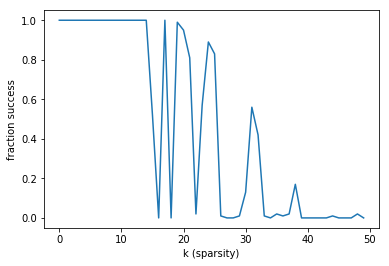

In [170]:
""" Your code here """
threshold = 0.085
""" Your code here"""
trails = 100
n = 100           # Matrix size
m = 50
iteration_n = 200
# error_all = []
fraction = []

for k in range(m):
    print(k)
#     k = 10            # Number of nonzeros 
#     k = t+1
#     print(k)
    
    x = np.concatenate((np.random.randn(k),np.zeros(n-k))) # Create sparse vector 
    x = x[np.random.permutation(n)];
    A = np.random.randn(m,n) 
                  # Create Matrix A 

    y = A.dot(x)     
    
    num_flag = 0
    for ii in range(trails):
        err,flag = projected_gradient_descent_stop(A,y,threshold,iteration_n)
#         print(err,flag)
        num_flag += flag
#         plt.plot(err)
    fraction.append(num_flag/trails)
#     x_all = projected_gradient_descent(A,y,iteration_n)
#     x_calculated = x_all[-1]
#     error = np.linalg.norm(x_calculated - x,2)
#     error_all.append(error)
    
plt.plot(); plt.xlabel('k (sparsity)'); plt.ylabel('fraction success');plt.plot(range(m),fraction)

__(b)__ Now, set the $n=50$ and sweep $\delta = \frac{m}{n}$ between [0,1] and $\eta = \frac{k}{n}$ between [0,1].  Plot the phase transition curve (as in Figure 3.15).

In [209]:
"""Your code here"""
""" Your code here """
threshold = 0.08
""" Your code here"""
trails = 100
n = 50           # Matrix size
# m = 50
iteration_n = 200
k_line = []
for m in range(n):
    print('m_row',m)
    # error_all = []
    fraction = []
    for k in range(m):
        print(k)
    #     k = 10            # Number of nonzeros 
    #     k = t+1
    #     print(k)

        x = np.concatenate((np.random.randn(k),np.zeros(n-k))) # Create sparse vector 
        x = x[np.random.permutation(n)];

        A = np.random.randn(m,n)                   # Create Matrix A 

        y = A.dot(x)     

        num_flag = 0
        for ii in range(trails):
            err,flag = projected_gradient_descent_stop(A,y,threshold,iteration_n)
    #         print(err,flag)
            num_flag += flag
    #         plt.plot(err)
        fraction.append(num_flag/trails)
    #     x_all = projected_gradient_descent(A,y,iteration_n)
    #     x_calculated = x_all[-1]
    #     error = np.linalg.norm(x_calculated - x,2)
    #     error_all.append(error)
    flag = 0
    for jj in range(m):
        if fraction[jj] < 0.5:
            k_line.append(jj)
            flag = 1
            #print(m,jj)
            break
    if flag == 0:
        if len(k_line) == 0:
            k_line.append(0)
        else:
            k_line.append(k_line[-1])
#plt.plot(); plt.xlabel('k (sparsity)'); plt.ylabel('fraction success');plt.plot(range(m),fraction)

m_row 0
m_row 1
0
m_row 2
0
1
m_row 3
0
1
2
m_row 4
0
1
2
3
m_row 5
0
1
2
3
4
m_row 6
0
1
2
3
4
5
m_row 7
0
1
2
3
4
5
6
m_row 8
0
1
2
3
4
5
6
7
m_row 9
0
1
2
3
4
5
6
7
8
m_row 10
0
1
2
3
4
5
6
7
8
9
m_row 11
0
1
2
3
4
5
6
7
8
9
10
m_row 12
0
1
2
3
4
5
6
7
8
9
10
11
m_row 13
0
1
2
3
4
5
6
7
8
9
10
11
12
m_row 14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
m_row 15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
m_row 16
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
m_row 17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
m_row 18
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
m_row 19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
m_row 20
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
m_row 21
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
m_row 22
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
m_row 23
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
m_row 24
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
m_row 25
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
m_row 

In [210]:
len(k_line)

50

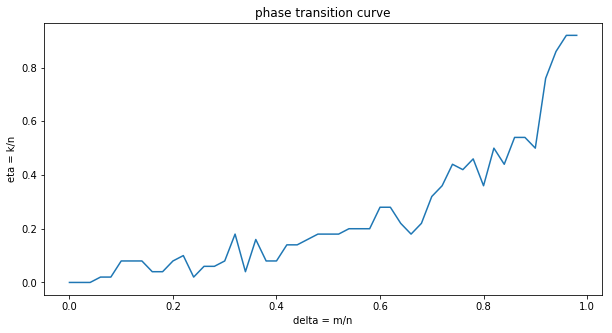

In [211]:
plt.figure(figsize=(10, 5));
plt.xlabel('delta = m/n'),  plt.ylabel('eta = k/n'), plt.plot(np.array(range(n))/n,np.array(k_line)/n)
plt.title('phase transition curve');

__(c)__ How would you interpret your findings?  When does $\ell_1$ minimization succeed? 

Write your response in this cell. 

## Part 4 -  $\ell_{\infty}$ minimization

Use the subdifferential of $\|\boldsymbol x\|_\infty$ to develop an algorithm to solve the optimization problem:
$$\min \| \boldsymbol x\|_\infty \quad \mbox{subject to} \quad \boldsymbol y = A \boldsymbol x.$$

Show an example of your algorithm working.

## Solution
Here, we used the subdifferential of infinity norm to solve the optimization problem

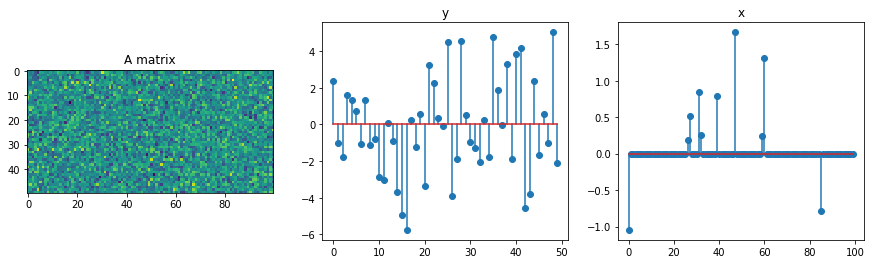

In [212]:
""" Your code here """
n = 100           # Matrix size
m = 50
k = 10            # Number of nonzeros 

x = np.concatenate((np.random.randn(k),np.zeros(n-k))) # Create sparse vector 
x = x[np.random.permutation(n)];

A = np.random.randn(m,n)                   # Create Matrix A 

y = A.dot(x)     

plt.figure(figsize=(15, 4));
plt.subplot(1,3,1), plt.imshow(A); plt.title('A matrix');
plt.subplot(1,3,2), plt.stem(y); plt.title('y');
plt.subplot(1,3,3), plt.stem(x); plt.title('x');

In [213]:
def sign(x):
    if x > 0:
        return 1
    if x < 0:
        return -1
    else:
        return np.random.uniform(-1,1)
def sign_max(x):
    x_p = np.zeros(x.shape)
    nmax = np.max(abs(x))
#     print(x.size)
    for j in range(x.size):
        if abs(x[j]) == nmax:
            x_p[j] = sign(x[j])
    return x_p

In [214]:
x_p = sign_max(x)
print(x_p)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [215]:
""" Your figures here """
def projected_gradient_descent(A,y,iteration):
    """ Your code here"""
    At = np.dot(A.T,np.linalg.inv(np.dot(A,A.T)))
    Atau = np.dot(At,A)
    Tau = np.identity(A.shape[1]) - Atau
    x_hat = np.dot(At,y)
    x0 = np.zeros(x_hat.shape)
    t = 0
    x_all = []
    for i in range(iteration):
#         print(i)
        t = t+1
        x0 = x_hat + np.dot(Tau,(x0-(1/t)*sign_max(x0)))
        x_all.append(x0)
    return x_all

In [219]:
x0 = projected_gradient_descent(A,y,100000)

In [222]:
err_max = []
for jj in range(100000):
    x1 = x0[jj]
    err_max.append(np.linalg.norm(x1-x,2))

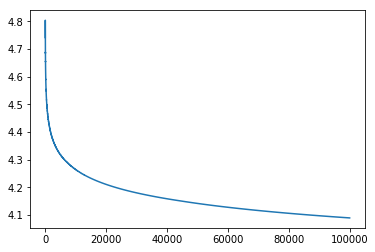

In [223]:
plt.plot(err_max)

Learning Curve of the $l_\infty  norm$

<StemContainer object of 3 artists>

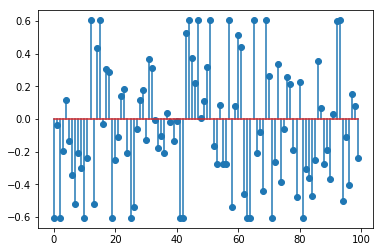

In [224]:
plt.stem(x0[-1])